Базовые алгоритмы классификации с использованием библиотеки sklearn (BankChurners.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import  export_graphviz
#import pydot_ng as pydot
import pydot

%matplotlib inline

1) Загрузить данные с сайта, считать и вывести на экран названия колонок и размер датасета

In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1)

In [3]:
# названия колонок
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
# размер
df.size

212667

2) Обработать пропуски (по возможности заполнить их или удалить)

In [5]:
df = df.dropna()

def Attrition_Flag(val):    
    if val == 'Existing Customer':
        return 0
    else:
        return 1

def Gender(val):    
    if val == 'M':
        return 0
    return 1

df['Attrition_Flag'] = df['Attrition_Flag'].apply(Attrition_Flag)
df['Gender'] = df['Gender'].apply(Gender)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,0,51,0,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,0,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,0,37,0,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,0,48,0,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


3) Визуализировать данные: 
 - построить график (heatmap) отображающий корреляции признаков между собой и с целевой переменной (разметкой); 
 - построить гистограммы распределения признаков;
 - построить ящичковые (boxplot) диаграммы признаков относительно целевой переменной.

<AxesSubplot:>

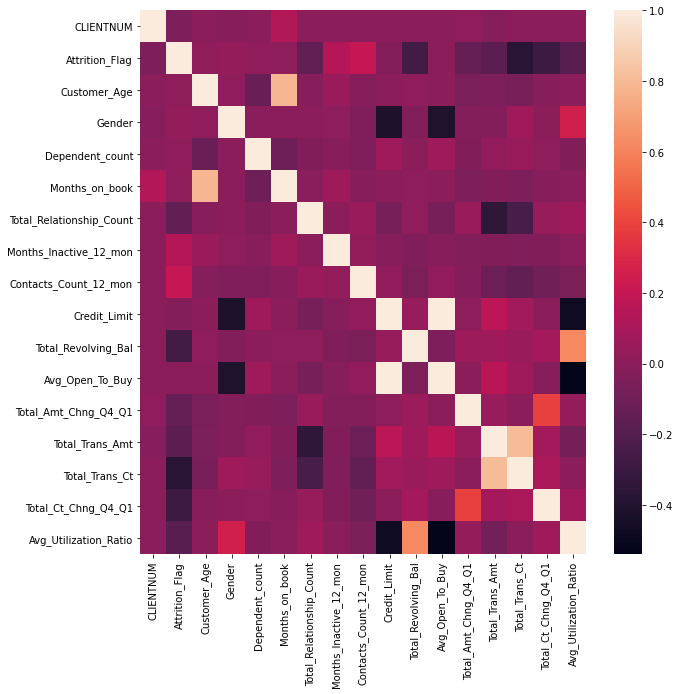

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

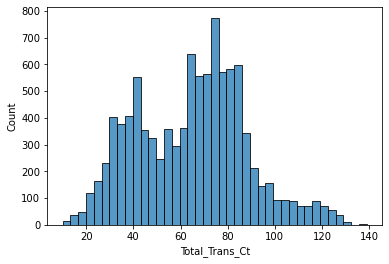

In [7]:
sns.histplot(df['Total_Trans_Ct'])

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

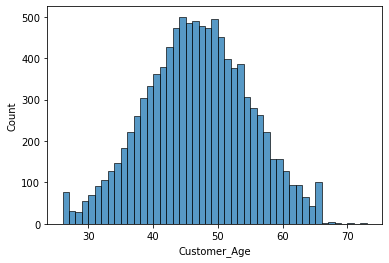

In [8]:
sns.histplot(df['Customer_Age'])

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

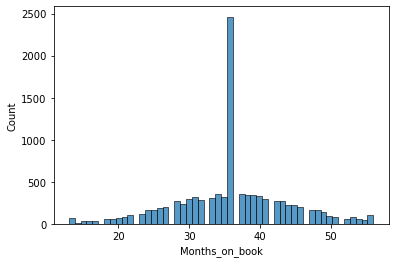

In [9]:
sns.histplot(df['Months_on_book'])

<AxesSubplot:xlabel='Card_Category', ylabel='Customer_Age'>

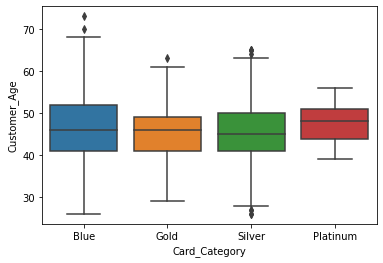

In [10]:
sns.boxplot(x='Card_Category',y='Customer_Age',data=df)

4) Масштабировать данные

In [11]:
df['Education_Level'] = pd.Categorical(df['Education_Level'])
df['Marital_Status'] = pd.Categorical(df['Marital_Status'])
df['Income_Category'] = pd.Categorical(df['Income_Category'])
df['Card_Category'] = pd.Categorical(df['Card_Category'])
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].astype(np.int64)

In [12]:
df.dtypes

CLIENTNUM                      int64
Attrition_Flag                 int64
Customer_Age                   int64
Gender                         int64
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio          int64
dtype: object

In [13]:
for column in df.select_dtypes(include='category').columns:
    if column=='Income_Category':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [14]:
scale = StandardScaler().fit(df.drop('Income_Category', axis=1))

scale_tr = scale.transform(df.drop('Income_Category', axis=1))

df_feat = pd.DataFrame(scale_tr, columns=df.columns[:-1])
df_feat.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum
0,0.802878,-0.437506,-0.165406,-1.059956,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,...,-0.414857,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
1,2.156861,-0.437506,0.333570,0.943436,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,...,-0.414857,-0.420076,-0.282405,-0.928214,1.252337,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
2,-0.682769,-0.437506,0.583058,-1.059956,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,...,-0.414857,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
3,0.832862,-0.437506,-0.789126,0.943436,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,...,-0.414857,-0.420076,-0.282405,-0.928214,-0.798507,3.538459,0.270611,-0.107644,-0.044484,-0.240794
4,-0.814896,-0.437506,-0.789126,-1.059956,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,...,2.410468,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794


5) Провести обучение следующих классификаторов:
 kNN(sklearn.neighbors.KNeighborsClassifier)
 обучить дерево принятия решений, визуализировать его (используя
sklearn.tree.export_graphviz и pydot)
 SVM(sklearn.svm.SVC)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(scale_tr, df['Income_Category'], test_size=0.2, random_state=42)

In [16]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predict = knn.predict(X_test)
    error.append(np.mean(predict != Y_test))
print('DONE')

DONE


Text(0, 0.5, 'error')

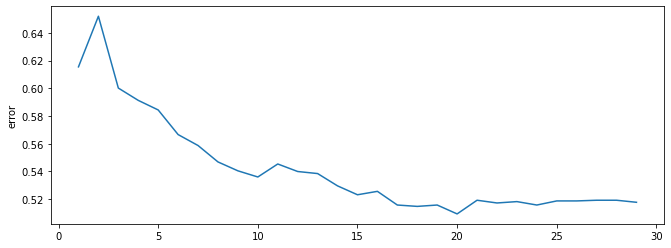

In [17]:
plt.figure(figsize=(11,4))
plt.plot(range(1, 30), error)
plt.ylabel('error')

In [18]:
# k =20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)
predict = knn.predict(X_test)

In [19]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
predict = tree.predict(X_test)

In [20]:
features = df.columns[:-1]

In [21]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features)

In [22]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

к сожалению я так и не смогла визуализировать (постоянные ошибки, и решения, которые в интернете мне не помогли)


In [24]:
Image(graph.create_png())

AttributeError: 'list' object has no attribute 'create_png'

In [24]:
svc = SVC()
svc.fit(X_train, Y_train)
predict = svc.predict(X_test)

6) Провести обучение ансамблевых классификаторов (Random Forest, AdaBoost, Gradient Boost)
Подобрать оптимальные параметры для каждой модели:
 Число ближайших соседей для kNN
 Для SVM рассмотреть линейное ядро и rbf, с помощью решетчатого поиска
( sklearn . grid _search.GridSearchCV) подобрать оптимальные «C» и «gamma»
 для ансамблевых методов найти оптимальные значения параметров с помощью
решетчатого поиска

In [49]:
rForest = RandomForestClassifier(criterion = "gini", max_depth=10, random_state=0)
rForest.fit(X_train, Y_train)
predict = rForest.predict(X_test)

In [40]:
n_estimators = [5, 10, 100, 200, 500]
max_depth = [None, 5, 10,15,20,25]
min_samples_split = [0.1,0.25,0.5,1,2]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, hyperparameters, cv=2, n_jobs=1, verbose=10)
best_model = clf.fit(X_train,Y_train)

_split=0.5, n_estimators=10 ............
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=10, score=0.440, total=   0.0s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=100 ...........
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=100, score=0.440, total=   0.2s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=100 ...........
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=100, score=0.439, total=   0.2s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=200 ...........
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=200, score=0.440, total=   0.5s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=200 ...........
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=200, score=0.441, total=   0.5s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=500 ...........
[CV]  max_depth=15, min_samples_split=0.5, n_estimators=500, score=0.440, total=   1.2s
[CV] max_depth=15, min_samples_split=0.5, n_estimators=500 ...........
[CV]  

In [42]:
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Best n_estimators: 500
Best max_depth: 15
Best min_samples_split: 2


In [43]:
adaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoost.fit(X_train, Y_train)
predict = adaBoost.predict(X_test)

In [45]:
param_dist = {
 'n_estimators': [100, 250, 500],
 'learning_rate' : [0.01, 0.1, 0.5],
 }

gridAB = GridSearchCV(AdaBoostClassifier(), param_dist, n_jobs=1)
gridAB.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [100, 250, 500]})

In [46]:
gridAB.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [50]:
gBoost = GradientBoostingClassifier(random_state=0)
gBoost.fit(X_train, Y_train)
predict = adaBoost.predict(X_test)

In [51]:
param_dist = {
 'loss': ['deviance', 'exponential'],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }

gridGB = GridSearchCV(GradientBoostingClassifier(), param_dist, n_jobs=1)
gridGB.fit(X_train, Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['deviance', 'exponential']})

In [52]:
gridGB.best_params_

{'learning_rate': 0.1, 'loss': 'deviance'}

In [53]:
prediction = gridGB.predict(X_test)

In [55]:
param_dist = {
 'criterion': ["entropy","gini"],
 'max_depth' : [2, 5, 10, 20, None],
 }

gridRF = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=1)
gridRF.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 20, None]})